<a href="https://colab.research.google.com/github/UznetDev/Data-science-home-work/blob/main/29_Okt_2024_home_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Condition

*Building a Decision Tree Regressor on the MPG dataset and plotting it. Show how the tree itself changes with respect to max_depth.*

## import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

## Load data

In [ ]:
df = pd.read_csv('auto.csv')
df.head(1)

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0


## Split data

In [ ]:
X = df.drop(['mpg', 'origin'], axis=1)
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Body

### Model's

In [ ]:
stat_data = pd.DataFrame(columns=['max_depth', 'mse', 'r2', 'rmse'])

In [ ]:
for i in range(1, 100):
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    row = {'max_depth': i, 'rmse': np.sqrt(mse), 'r2': r2, 'mse': mse}
    stat_data = pd.concat([stat_data, pd.DataFrame([row])], ignore_index=True)

In [ ]:
stat_data

,max_depth,mse,r2,rmse
0,1,30.887877,0.504542,5.557686
1,2,24.278626,0.610558,4.927335
2,3,23.861333,0.617252,4.884806
3,4,23.986246,0.615248,4.897576
4,5,27.393436,0.560595,5.233874
...,...,...,...,...
94,95,30.458734,0.511426,5.518943
95,96,30.340127,0.513328,5.508187
96,97,36.515316,0.414275,6.042790
97,98,39.164810,0.371776,6.258179


### Visualization

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=stat_data['max_depth'],
    y=stat_data['mse'],
    name='MSE',
    yaxis='y1',
    mode='lines+markers',
    line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=stat_data['max_depth'],
    y=stat_data['r2'],
    name='R²',
    yaxis='y2',
    mode='lines+markers',
    line=dict(color='red')
))

fig.update_layout(
    title='Max Depth vs MSE va R²',
    xaxis=dict(title='max_depth'),
    yaxis=dict(
        title='MSE',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue'),
        side='left'
    ),
    yaxis2=dict(
        title='R²',
        titlefont=dict(color='red'),
        tickfont=dict(color='red'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.1, y=1.1),
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.show()

#### Scatter plot for RMSE

In [ ]:
fig = px.scatter(
    stat_data,
    x='max_depth',
    y='rmse',
    title='Max Depth ga nisbatan RMSE',
    labels={
        'max_depth': 'Max Depth',
        'rmse': 'RMSE'
    },
    trendline="ols"
)
fig.show()


#### Scatter plot for MSE

In [ ]:
fig = px.scatter(
    stat_data,
    x='max_depth',
    y='mse',
    title='Max Depth ga nisbatan MSE',
    labels={
        'max_depth': 'Max Depth',
        'mse': 'MSE'
    },
    trendline="ols"
)
fig.show()

#### Scatter plot for r2

In [ ]:
fig = px.scatter(
    stat_data,
    x='max_depth',
    y='r2',
    title='Max Depth ga nisbatan R²',
    labels={
        'max_depth': 'Max Depth',
        'r2': 'R²'
    },
    trendline="ols"
)
fig.show()

#### Final

In [ ]:
max_r2 = stat_data['r2'].max()
max_r2_depth = stat_data.loc[stat_data['r2'] == max_r2, 'max_depth'].iloc[0]

min_rmse = stat_data['rmse'].min()
min_rmse_depth = stat_data.loc[stat_data['rmse'] == min_rmse, 'max_depth'].iloc[0]

print(f"Eng yuqori R²: {max_r2}, unga mos max_depth: {max_r2_depth}")
print(f"Eng kichik RMSE: {min_rmse}, unga mos max_depth: {min_rmse_depth}")

Eng yuqori R²: 0.617251530642114, unga mos max_depth: 3
Eng kichik RMSE: 4.8848063590038295, unga mos max_depth: 3


Eng yaxshi max depth 3

In [ ]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"R²: {r2}")
print(f"RMSE: {rmse}")

MSE: 23.861333164964247
R²: 0.617251530642114
RMSE: 4.8848063590038295


##### Plot Tree

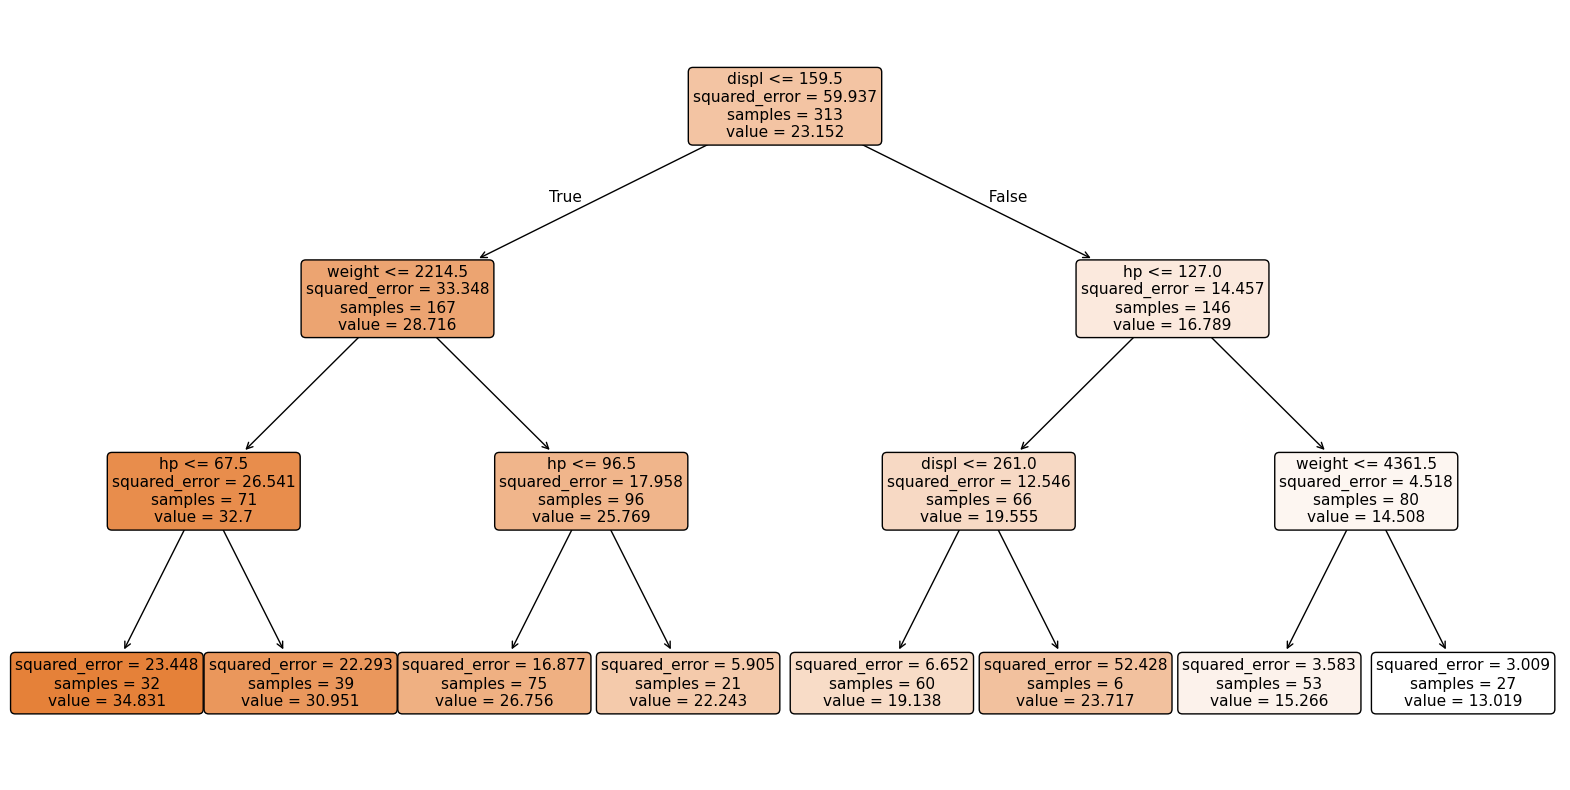

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.show()